In [1]:
!nvidia-smi

Thu Sep 16 18:50:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install tensorflow-gpu

     |████████████████████████████████| 458.3 MB 11 kB/s 


In [3]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [5]:
IMAGE_SIZE = [224, 224]
X= '/content/drive/MyDrive/Colab Notebooks/Covid Dataset'
y= '/content/drive/MyDrive/Colab Notebooks/Covid Dataset'

In [6]:
from sklearn.model_selection import train_test_split
X_train, y_train,X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [7]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 2s 0us/step


In [8]:
for layer in inception.layers:
    layer.trainable = False

In [9]:
folders = glob('/content/drive/MyDrive/Colab Notebooks/Covid Dataset/*')

In [10]:
folders

['/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Pneumonia',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Fungal',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Normal',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Unknown',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Viral',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Tuberculosis',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Covid',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Lipoid',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Bacterial',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Other']

In [11]:
x = Flatten()(inception.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Covid Dataset',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 877 images belonging to 10 classes.


In [17]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Covid Dataset',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 877 images belonging to 10 classes.


In [18]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
55/55 [==============================] - 769s 14s/step - loss: 7.6312 - accuracy: 0.6283 - val_loss: 1.2235 - val_accuracy: 0.8940
Epoch 2/20
55/55 [==============================] - 263s 5s/step - loss: 1.0094 - accuracy: 0.8962 - val_loss: 1.0521 - val_accuracy: 0.9008
Epoch 3/20
55/55 [==============================] - 263s 5s/step - loss: 1.1178 - accuracy: 0.8860 - val_loss: 0.5038 - val_accuracy: 0.9304
Epoch 4/20
55/55 [==============================] - 264s 5s/step - loss: 1.1776 - accuracy: 0.8883 - val_loss: 0.2386 - val_accuracy: 0.9658
Epoch 5/20
55/55 [==============================] - 264s 5s/step - loss: 0.5468 - accuracy: 0.9384 - val_loss: 0.3225 - val_accuracy: 0.9510
Epoch 6/20
55/55 [==============================] - 264s 5s/step - loss: 0.5385 - accuracy: 0.9361 - val_loss: 0.1303 - val_accuracy: 0.9795
Epoch 7/20
55/55 [==============================] - 263s 5s/step - loss: 0.8226 - accuracy: 0.9259 - val_loss: 0.9546 - val_accuracy: 0.9373
Epoch 8/20
5

In [19]:
import matplotlib.pyplot as plt

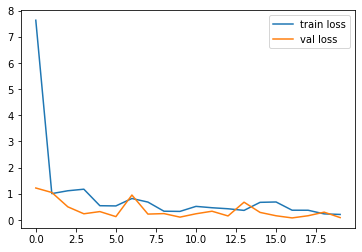

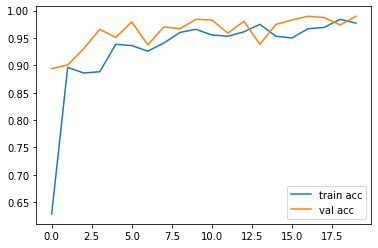

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [22]:
y_pred = model.predict(test_set)

In [23]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.6908797e-31, 4.2352088e-21, 1.4108918e-32, ..., 0.0000000e+00,
        1.8078005e-35, 1.5198735e-33],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       ...,
       [8.3893053e-36, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 3.9195843e-38, 0.0000000e+00, ..., 0.0000000e+00,
        2.3076522e-31, 0.0000000e+00],
       [0.0000000e+00, 4.2094316e-24, 1.6272967e-36, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([5, 5, 8, 6, 8, 8, 0, 4, 1, 9, 9, 3, 5, 7, 7, 8, 0, 8, 3, 4, 5, 0,
       9, 9, 4, 8, 7, 4, 5, 9, 4, 8, 5, 3, 4, 2, 5, 4, 3, 8, 6, 6, 0, 5,
       3, 6, 5, 0, 1, 5, 8, 9, 8, 0, 7, 7, 4, 6, 2, 5, 0, 8, 5, 2, 4, 6,
       0, 7, 1, 3, 7, 8, 6, 8, 0, 8, 9, 3, 3, 8, 1, 1, 6, 6, 4, 4, 9, 4,
       5, 5, 5, 7, 1, 5, 2, 5, 3, 8, 8, 3, 6, 5, 4, 2, 3, 1, 8, 3, 5, 1,
       6, 0, 0, 4, 3, 7, 5, 3, 9, 8, 0, 7, 4, 6, 3, 4, 0, 7, 4, 5, 8, 5,
       0, 2, 2, 3, 0, 0, 2, 7, 4, 4, 9, 1, 0, 4, 5, 0, 8, 7, 9, 7, 5, 5,
       6, 4, 7, 4, 4, 7, 9, 6, 2, 5, 2, 0, 5, 5, 0, 9, 7, 5, 9, 5, 9, 7,
       3, 4, 4, 6, 5, 4, 6, 9, 2, 7, 5, 5, 9, 1, 0, 0, 7, 1, 0, 7, 3, 5,
       0, 0, 6, 3, 3, 6, 8, 3, 8, 2, 9, 4, 9, 3, 4, 5, 4, 0, 4, 7, 3, 1,
       3, 3, 5, 7, 8, 0, 4, 6, 3, 4, 7, 9, 5, 2, 9, 1, 7, 9, 5, 3, 3, 7,
       6, 7, 3, 3, 4, 3, 6, 0, 1, 7, 4, 9, 0, 7, 5, 7, 0, 9, 7, 5, 0, 7,
       8, 9, 9, 4, 8, 7, 2, 0, 7, 2, 3, 4, 3, 9, 1, 8, 0, 0, 6, 4, 6, 5,
       2, 1, 8, 4, 6, 5, 4, 5, 9, 8, 7, 7, 5, 9, 0,

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
model=load_model('model_inception.h5')

In [28]:
img=image.load_img('/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Unknown/Unknown_0_1080.jpeg',target_size=(224,224))

In [29]:
x=image.img_to_array(img)

In [30]:
x

array([[[  3.,   3.,   3.],
        [ 57.,  57.,  57.],
        [ 82.,  82.,  82.],
        ...,
        [155., 155., 155.],
        [164., 164., 164.],
        [169., 169., 169.]],

       [[102., 102., 102.],
        [ 94.,  94.,  94.],
        [ 79.,  79.,  79.],
        ...,
        [ 12.,  12.,  12.],
        [  6.,   6.,   6.],
        [  6.,   6.,   6.]],

       [[132., 132., 132.],
        [104., 104., 104.],
        [ 83.,  83.,  83.],
        ...,
        [ 10.,  10.,  10.],
        [  1.,   1.,   1.],
        [242., 242., 242.]],

       ...,

       [[179., 179., 179.],
        [183., 183., 183.],
        [183., 183., 183.],
        ...,
        [142., 142., 142.],
        [144., 144., 144.],
        [151., 151., 151.]],

       [[ 11.,  11.,  11.],
        [  3.,   3.,   3.],
        [  6.,   6.,   6.],
        ...,
        [157., 157., 157.],
        [151., 151., 151.],
        [150., 150., 150.]],

       [[ 14.,  14.,  14.],
        [  7.,   7.,   7.],
        [  7.,  

In [31]:
x.shape

(224, 224, 3)

In [32]:
x=x/255

In [33]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [34]:
img_data

array([[[[-0.99990773, -0.99990773, -0.99990773],
         [-0.99824685, -0.99824685, -0.99824685],
         [-0.9974779 , -0.9974779 , -0.9974779 ],
         ...,
         [-0.9952326 , -0.9952326 , -0.9952326 ],
         [-0.9949558 , -0.9949558 , -0.9949558 ],
         [-0.994802  , -0.994802  , -0.994802  ]],

        [[-0.99686277, -0.99686277, -0.99686277],
         [-0.9971088 , -0.9971088 , -0.9971088 ],
         [-0.99757016, -0.99757016, -0.99757016],
         ...,
         [-0.9996309 , -0.9996309 , -0.9996309 ],
         [-0.99981546, -0.99981546, -0.99981546],
         [-0.99981546, -0.99981546, -0.99981546]],

        [[-0.99594   , -0.99594   , -0.99594   ],
         [-0.99680126, -0.99680126, -0.99680126],
         [-0.99744713, -0.99744713, -0.99744713],
         ...,
         [-0.99969244, -0.99969244, -0.99969244],
         [-0.99996924, -0.99996924, -0.99996924],
         [-0.9925567 , -0.9925567 , -0.9925567 ]],

        ...,

        [[-0.99449444, -0.99449444, -0

In [35]:
model.predict(img_data)

array([[2.3271898e-05, 7.8513008e-03, 3.5874522e-03, 1.2212581e-10,
        3.1651618e-07, 2.8012156e-01, 3.0526600e-03, 6.4386114e-07,
        7.0532411e-01, 3.8702121e-05]], dtype=float32)

In [36]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

array([ True])